# Desicion surface based on MLP


# Importing required libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from mlxtend.plotting import plot_decision_regions;

In [2]:
data=pd.read_csv(r"C:\Users\DELL\Desktop\downloads\1.ushape.csv",header=None)

In [4]:
data

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


In [5]:
data[2].value_counts()

0.0    50
1.0    50
Name: 2, dtype: int64

# Scatterplot of original dataset

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

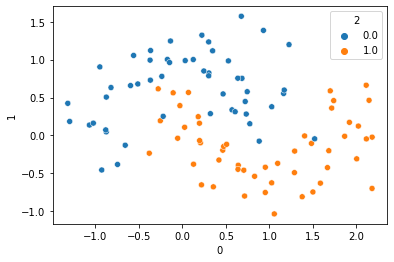

In [6]:
sns.scatterplot(data[0],data[1],hue=data[2])

# Splitting of dataset

In [7]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [120]:
std = StandardScaler()


In [121]:
stdd=std.fit_transform(x_train)

# Creating hidden layers 

In [8]:
model=Sequential()
model.add(Dense(10,activation="relu",input_dim=2,kernel_initializer="he_uniform"))
model.add(Dropout(0.4))
model.add(Dense(6,activation="relu",kernel_initializer="he_uniform"))
model.add(Dropout(0.4))

model.add(Dense(1,activation="sigmoid"))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [11]:
tr=model.fit(x_train,y_train,batch_size=10,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 20s 87ms/step - loss: 0.9197 - accuracy: 0.4306 - val_loss: 0.6844 - val_accuracy: 0.5000
Epoch 2/50
8/8 [==============================] - 0s 11ms/step - loss: 0.8739 - accuracy: 0.3889 - val_loss: 0.6726 - val_accuracy: 0.5000
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.8627 - accuracy: 0.5000 - val_loss: 0.6599 - val_accuracy: 0.5000
Epoch 4/50
8/8 [==============================] - 0s 12ms/step - loss: 0.8973 - accuracy: 0.5278 - val_loss: 0.6489 - val_accuracy: 0.5000
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 0.7730 - accuracy: 0.5417 - val_loss: 0.6384 - val_accuracy: 0.5000
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 0.7949 - accuracy: 0.4861 - val_loss: 0.6294 - val_accuracy: 0.5000
Epoch 7/50
8/8 [==============================] - 0s 13ms/step - loss: 0.8532 - accuracy: 0.4583 - val_loss: 0.6200 - val_accuracy: 0.5556
Epoch 8/50
8/8 [==========

In [12]:
tl1=tr.history["loss"]
cvl1=tr.history["val_loss"]

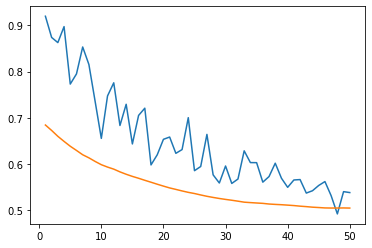

In [13]:
plt.plot(range(1,51),tl1,label="training_loss")
plt.plot(range(1,51),cvl1,label="crossval_loss")

In [14]:
pred1=model.predict(x_train)

3/3 [==============================] - 0s 3ms/step


In [15]:
predi1=np.where(pred1>0.5,1,0).flatten()

In [16]:
accuracy_score(y_train,predi1)

0.8111111111111111

3888/3888 [==============================] - 9s 2ms/step


<AxesSubplot:>

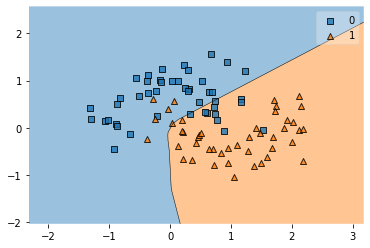

In [17]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)